In [1]:
## Notebook to produce velocity cross sections along the Antarctic 
## shelf for GFDL-CM4 Antwater-Stress experiment last 20 years

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import cartopy.crs as ccrs
 
# additional configuration (optional)
%config InlineBackend.figure_format = 'retina'

from dask.distributed import Client #client is the interface to
from dask.distributed import LocalCluster #Start the cluster locally
cluster = LocalCluster()
client = Client(cluster) #Connect the client to the c
client

/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxarray/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35840 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:42589 Dashboard: http://127.0.0.1:35840/status,Cluster Workers: 4 Cores: 8 Memory: 33.22 GB


In [2]:
### Load datasets volcello, static, and uo:

ds_cm4_static = xr.open_dataset('/net/Rebecca.Beadling/subtropical_gyres/mode_water/ocean_monthly.static.nc')

ds_volcello_fafantwaterstress_251 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_output/ocean_annual_z.0001-0070.volcello.nc').sel(time=slice('0051-07-02','0070-07-02')).sel(yh=slice(-90,-30))
ds_volcello_fafantwaterstress_290 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_290/ocean_annual_z.0051-0070.volcello.nc').sel(time=slice('0051-07-02','0070-07-02')).sel(yh=slice(-90,-30))
ds_volcello_fafantwaterstress_332 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_332/ocean_annual_z.0051-0070.volcello.nc').sel(time=slice('0051-07-02','0070-07-02')).sel(yh=slice(-90,-30))


ds_uo_cm4_fafantwaterstress_251 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_output/ocean_annual_z.0051-0070.uo.nc',
                                           chunks={'time':5,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))

ds_uo_cm4_fafantwaterstress_290 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_290/ocean_annual_z.0051-0070.uo.nc',
                                           chunks={'time':5,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))

ds_uo_cm4_fafantwaterstress_332 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_332/ocean_annual_z.0051-0070.uo.nc',
                                           chunks={'time':5,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))

## piControl
ds_uo_cm4_piControl = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/piControl_output/ocean_annual_z.0281-0380.uo.nc',
                                           chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))


/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxarray/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [3]:
ds_uo_cm4_piControl
piControl_uo = ds_uo_cm4_piControl.uo.sel(yh=slice(-90,-30))
piControl_uo_ave = piControl_uo.mean(dim='time')

In [4]:
### Compute ensemble mean years 51 to 70 uo and volcello fields:
fafantwaterstress_ensemble_uo = xr.concat([ds_uo_cm4_fafantwaterstress_251,ds_uo_cm4_fafantwaterstress_290,ds_uo_cm4_fafantwaterstress_332],dim='member')
fafantwaterstress_ensemble_mean_uo = fafantwaterstress_ensemble_uo.uo.mean(dim='member')

fafantwaterstress_ensemble_volcello = xr.concat([ds_volcello_fafantwaterstress_251,ds_volcello_fafantwaterstress_290,ds_volcello_fafantwaterstress_332],dim='member')
fafantwaterstress_ensemble_mean_volcello = fafantwaterstress_ensemble_volcello.volcello.mean(dim='member')

/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxarray/lib/python3.8/site-packages/numpy/core/_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxarray/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [5]:
### Slice ensemble mean at the 4 different cross-sections for Antwater-Stress and piControl
## 20E
asc_region_antwaterstress_20e = fafantwaterstress_ensemble_mean_uo.sel(yh=slice(-70.5,-68)).sel(xq=20,method='nearest').mean(dim='time')
asc_region_piControl_20e = piControl_uo_ave.sel(yh=slice(-70.5,-68)).sel(xq=20,method='nearest')
##150E
asc_region_antwaterstress_150E = fafantwaterstress_ensemble_mean_uo.sel(yh=slice(-69,-65.2)).sel(xq=-210,method='nearest').mean(dim='time')
asc_region_piControl_150E = piControl_uo_ave.sel(yh=slice(-69,-65.2)).sel(xq=-210,method='nearest')
#130W
asc_region_antwaterstress_130W = fafantwaterstress_ensemble_mean_uo.sel(yh=slice(-75,-72)).sel(xq=-130,method='nearest').mean(dim='time')
asc_region_piControl_130W = piControl_uo_ave.sel(yh=slice(-75,-72)).sel(xq=-130,method='nearest')
#80W
asc_region_antwaterstress_80W = fafantwaterstress_ensemble_mean_uo.sel(yh=slice(-74,-68)).sel(xq=-80,method='nearest').mean(dim='time')
asc_region_piControl_80W = piControl_uo_ave.sel(yh=slice(-74,-68)).sel(xq=-80,method='nearest')



In [6]:
## We want to replace z_l with the true bottom location ... z_l is the cell center, and z_i is the 
## cell interfaces. However, MOM6 has a linear-continous representation of the bottom.
## We need to plot bottom position to generate the proper mask. Using just the data field is
## insufficient since the netcdf file only has a discrete value for the bottom depth.

# get full cell thickness information, not accounting for partial cells:
# vertical position of center 
z_l = ds_uo_cm4_fafantwaterstress_251['z_l'].values  # vertical position of cell center 
z_i = ds_uo_cm4_fafantwaterstress_251['z_i'].values  # vertical position of cell interface 

# to get full thickness, need to find the distance (dz) between the cell interfaces z_i
dz = z_i[1:] - z_i[:-1]    ## bottom of cell (z_i[1:] ... entire array except the first element) minus top of cell (entire array except the last element)
np.ma.is_masked(dz)        ## masked arrays are arrays that have missing or invalid entries. This determines whether the input has masked values. Returns false, so it does not.

False

In [7]:
## Compute the partial cell thickness at each cross section:
area_20e = ds_cm4_static.areacello.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest')
area_150e = ds_cm4_static.areacello.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest')
area_130w = ds_cm4_static.areacello.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest')
area_80w = ds_cm4_static.areacello.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest')

volume_20e = fafantwaterstress_ensemble_mean_volcello.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').mean(dim='time')
volume_150e = fafantwaterstress_ensemble_mean_volcello.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').mean(dim='time')
volume_130w = fafantwaterstress_ensemble_mean_volcello.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').mean(dim='time')
volume_80w = fafantwaterstress_ensemble_mean_volcello.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').mean(dim='time')

thickness_20e_antwaterstress = volume_20e/area_20e
thickness_150e_antwaterstress = volume_150e/area_150e
thickness_130w_antwaterstress = volume_130w/area_130w
thickness_80w_antwaterstress = volume_80w/area_80w

/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxarray/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<ipython-input-18-1b6406de659a>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(lat_80w,z_l,thickness_80w_antwaterstress)


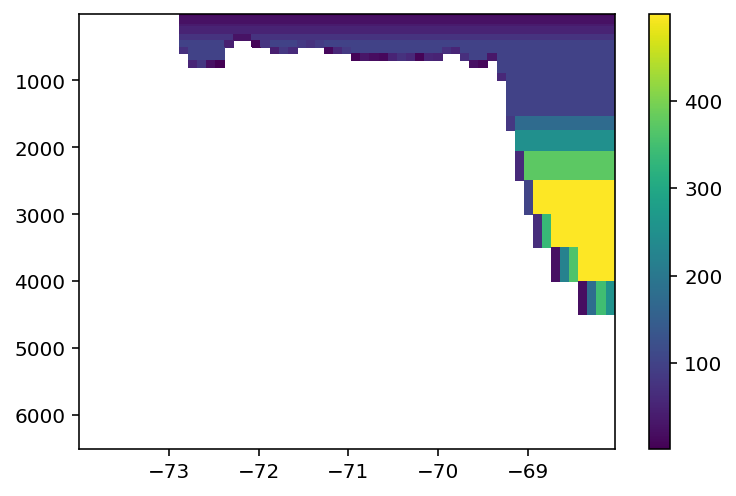

In [18]:
z_l = ds_uo_cm4_fafantwaterstress_251['z_l'].values    
z_i = ds_uo_cm4_fafantwaterstress_251['z_i'].values    
lat_20e = ds_uo_cm4_fafantwaterstress_251['yh'].sel(yh=slice(-70.5,-68)).values  
lat_150e = ds_uo_cm4_fafantwaterstress_251['yh'].sel(yh=slice(-69,-65.2)).values 
lat_130w = ds_uo_cm4_fafantwaterstress_251['yh'].sel(yh=slice(-75,-72)).values 
lat_80w = ds_uo_cm4_fafantwaterstress_251['yh'].sel(yh=slice(-74,-68)).values 

im = plt.pcolormesh(lat_80w,z_l,thickness_80w_antwaterstress)
plt.gca().invert_yaxis()
plt.colorbar(im)

In [8]:
## get depth to center of partial cell:

### 20e
kmax = thickness_20e_antwaterstress.shape[0]  ##Maximum k value, == 35
zl_20e_antwaterstress  = 0.0 * thickness_20e_antwaterstress[:]   ## Take all the values for thickness at 20e and multiply by zero. 
                                                                     ## so values are now zero where there was a value and NaN elsewhere
zl_20e_antwaterstress[0] = 0.5 * thickness_20e_antwaterstress[0] ## Multiple first element by 0.5.

k_20e = 1
while k_20e < kmax:
    zl_20e_antwaterstress[k_20e] = zl_20e_antwaterstress[k_20e-1] + 0.5 * (thickness_20e_antwaterstress[k_20e]+thickness_20e_antwaterstress[k_20e-1])
    k_20e=k_20e+1
    
zl_20e_antwaterstress_nm = np.array(zl_20e_antwaterstress)


### 150e
zl_150e_antwaterstress  = 0.0 * thickness_150e_antwaterstress[:]   ## Take all the values for thickness at 20e and multiply by zero. 
                                                                     ## so values are now zero where there was a value and NaN elsewhere
zl_150e_antwaterstress[0] = 0.5 * thickness_150e_antwaterstress[0] ## Multiple first element by 0.5.

k_150e = 1
while k_150e < kmax:
    zl_150e_antwaterstress[k_150e] = zl_150e_antwaterstress[k_150e-1] + 0.5 * (thickness_150e_antwaterstress[k_150e]+thickness_150e_antwaterstress[k_150e-1])
    k_150e=k_150e+1
    
zl_150e_antwaterstress_nm = np.array(zl_150e_antwaterstress)
    

### 130w
zl_130w_antwaterstress  = 0.0 * thickness_130w_antwaterstress[:]   ## Take all the values for thickness at 20e and multiply by zero. 
                                                                     ## so values are now zero where there was a value and NaN elsewhere
zl_130w_antwaterstress[0] = 0.5 * thickness_130w_antwaterstress[0] ## Multiple first element by 0.5.

k_130w = 1
while k_130w < kmax:
    zl_130w_antwaterstress[k_130w] = zl_130w_antwaterstress[k_130w-1] + 0.5 * (thickness_130w_antwaterstress[k_130w]+thickness_130w_antwaterstress[k_130w-1])
    k_130w=k_130w+1
    
zl_130w_antwaterstress_nm = np.array(zl_130w_antwaterstress)
    
    
### 80w
zl_80w_antwaterstress  = 0.0 * thickness_80w_antwaterstress[:]   ## Take all the values for thickness at 20e and multiply by zero. 
                                                                     ## so values are now zero where there was a value and NaN elsewhere
zl_80w_antwaterstress[0] = 0.5 * thickness_80w_antwaterstress[0] ## Multiple first element by 0.5.

k_80w = 1
while k_80w < kmax:
    zl_80w_antwaterstress[k_80w] = zl_80w_antwaterstress[k_80w-1] + 0.5 * (thickness_80w_antwaterstress[k_80w]+thickness_80w_antwaterstress[k_80w-1])
    k_80w=k_80w+1
    
zl_80w_antwaterstress_nm = np.array(zl_80w_antwaterstress)

<ipython-input-20-ad190770a455>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(lat_20e,z_l,zl_20e_antwaterstress)


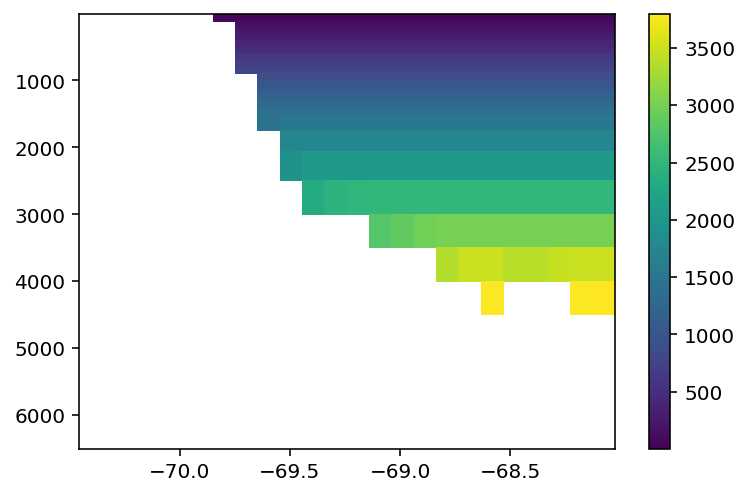

In [20]:
im = plt.pcolormesh(lat_20e,z_l,zl_20e_antwaterstress)
plt.gca().invert_yaxis()
plt.colorbar(im)

In [9]:
## Cannot have NaNs in the zl_20e_antwaterstress to use as coordinate in pcolormesh:
def forward_fill(arr):
    """ Forward fill a 2-D array along the column dimension"""
    # make a copy of the input array
    out = arr * 1.0
    # loop over column index
    for col_idx in range(0,arr.shape[1]):
        # get the column to work on
        _row = arr[:,col_idx]
        # get index numbers of nan values
        _nan_vals = np.argwhere(np.isnan(_row))
        # find the last "good" value
        _depth = 0. if _nan_vals[0] == 0 else _row[_nan_vals[0]-1]
        # set nan values to the last good value
        _row = np.where(np.isnan(_row),_depth,_row)
        # re-assign the filled column
        out[:,col_idx] = _row
    return out

In [42]:
out = zl_20e_antwaterstress_nm*1.0

for col_idx in range(10,zl_20e_antwaterstress_nm.shape[1]):
        # get the column to work on
        _row = zl_20e_antwaterstress_nm[:,col_idx]
        _nan_vals = np.argwhere(np.isnan(_row))
        _depth = 0. if _nan_vals[0] == 0 else _row[_nan_vals[0]-1]
#_row.shape

_depth.shape

(1,)

In [10]:
zl_20e = forward_fill(zl_20e_antwaterstress_nm)
zl_150e = forward_fill(zl_150e_antwaterstress_nm)
zl_130w = forward_fill(zl_130w_antwaterstress_nm)
zl_80w = forward_fill(zl_80w_antwaterstress_nm)

In [23]:
#asc_region_antwaterstress_20e.shape
lat_20e.shape

(25,)

In [13]:
# Broadcast lat to zl_20e (etc)
lat_20e_b = np.broadcast_to(lat_20e,zl_20e.shape)
lat_150e_b = np.broadcast_to(lat_150e,zl_150e.shape)
lat_130w_b = np.broadcast_to(lat_130w,zl_130w.shape)
lat_80w_b = np.broadcast_to(lat_80w,zl_80w.shape)

lat_20e_b.shape

(35, 25)

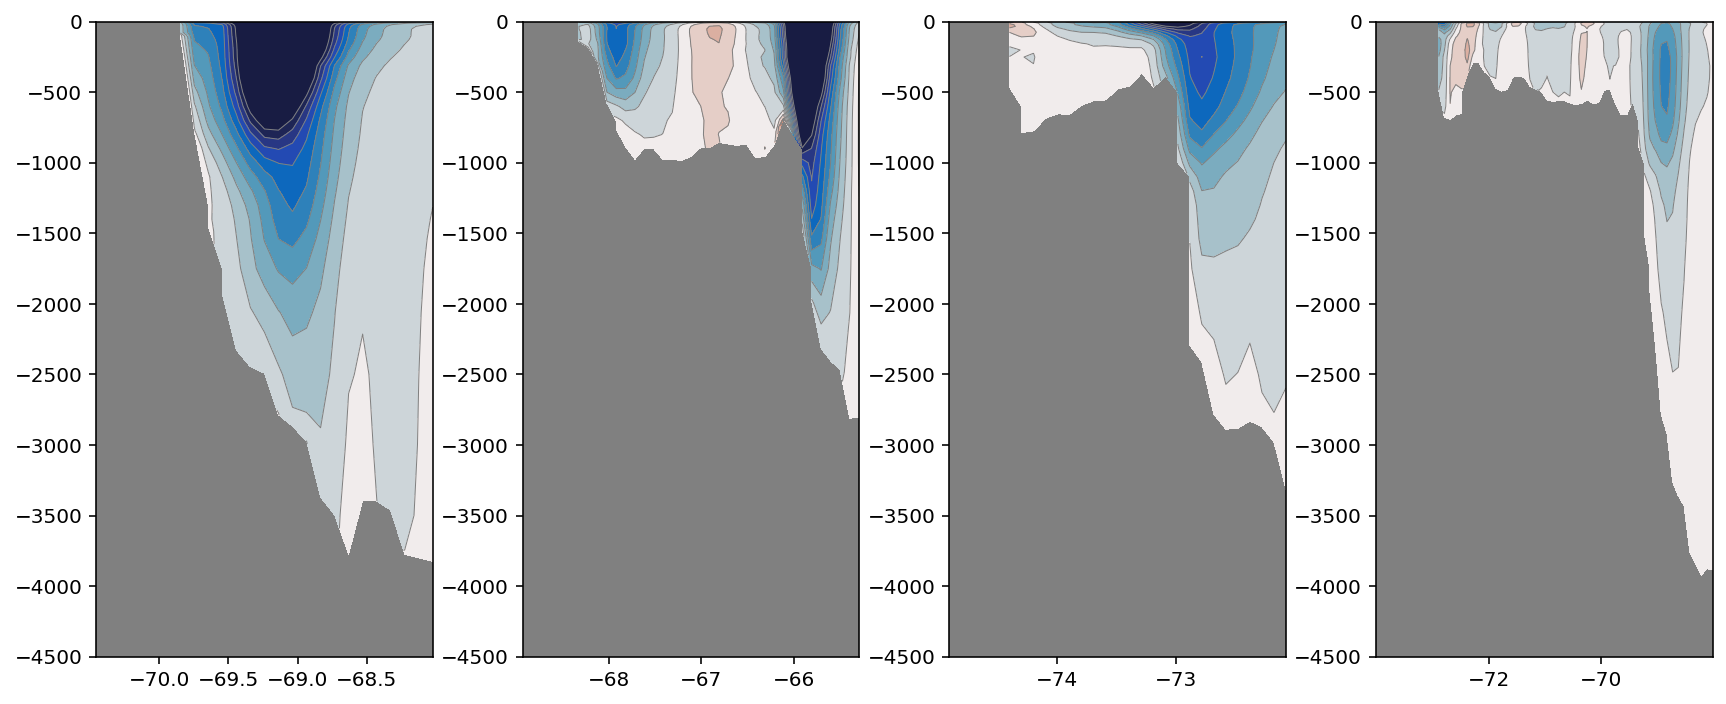

In [127]:
### Velocity at all cross-sections:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(12,5),subplot_kw=dict(facecolor='grey'))
plt.tight_layout()

custom_ylim = (-4500,0)
plt.setp(ax1, ylim=custom_ylim)
plt.setp(ax2, ylim=custom_ylim)
plt.setp(ax3, ylim=custom_ylim)
plt.setp(ax4, ylim=custom_ylim)

levels_vel = np.linspace(-0.16,0.16,20)

ax1.contourf(lat_20e_b,-zl_20e,asc_region_antwaterstress_20e,cmap=cmocean.cm.balance,vmin=-0.16,vmax=0.16,levels=levels_vel,extend='both')
ax1.contour(lat_20e_b,-zl_20e,asc_region_antwaterstress_20e,colors='gray',vmin=-0.16,vmax=0.16,levels=levels_vel,linestyles='-',linewidths=0.5,extend='both')
plt.gca().invert_yaxis()

ax2.contourf(lat_150e_b,-zl_150e,asc_region_antwaterstress_150E,cmap=cmocean.cm.balance,vmin=-0.16,vmax=0.16,levels=levels_vel,extend='both')
ax2.contour(lat_150e_b,-zl_150e,asc_region_antwaterstress_150E,colors='gray',vmin=-0.16,vmax=0.16,levels=levels_vel,linestyles='-',linewidths=0.5)
plt.gca().invert_yaxis()

ax3.contourf(lat_130w_b,-zl_130w,asc_region_antwaterstress_130W,cmap=cmocean.cm.balance,vmin=-0.16,vmax=0.16,levels=levels_vel,extend='both')
ax3.contour(lat_130w_b,-zl_130w,asc_region_antwaterstress_130W,colors='gray',vmin=-0.16,vmax=0.16,levels=levels_vel,linestyles='-',linewidths=0.5)
plt.gca().invert_yaxis()

ax4.contourf(lat_80w_b,-zl_80w,asc_region_antwaterstress_80W,cmap=cmocean.cm.balance,vmin=-0.16,vmax=0.16,levels=levels_vel,extend='both')
ax4.contour(lat_80w_b,-zl_80w,asc_region_antwaterstress_80W,colors='gray',vmin=-0.16,vmax=0.16,levels=levels_vel,linestyles='-',linewidths=0.5)
plt.gca().invert_yaxis()

f.savefig('CM4-AntwaterStress_Ens_Average_years51-70_truebath_correct.pdf', bbox_inches='tight', dpi=300)

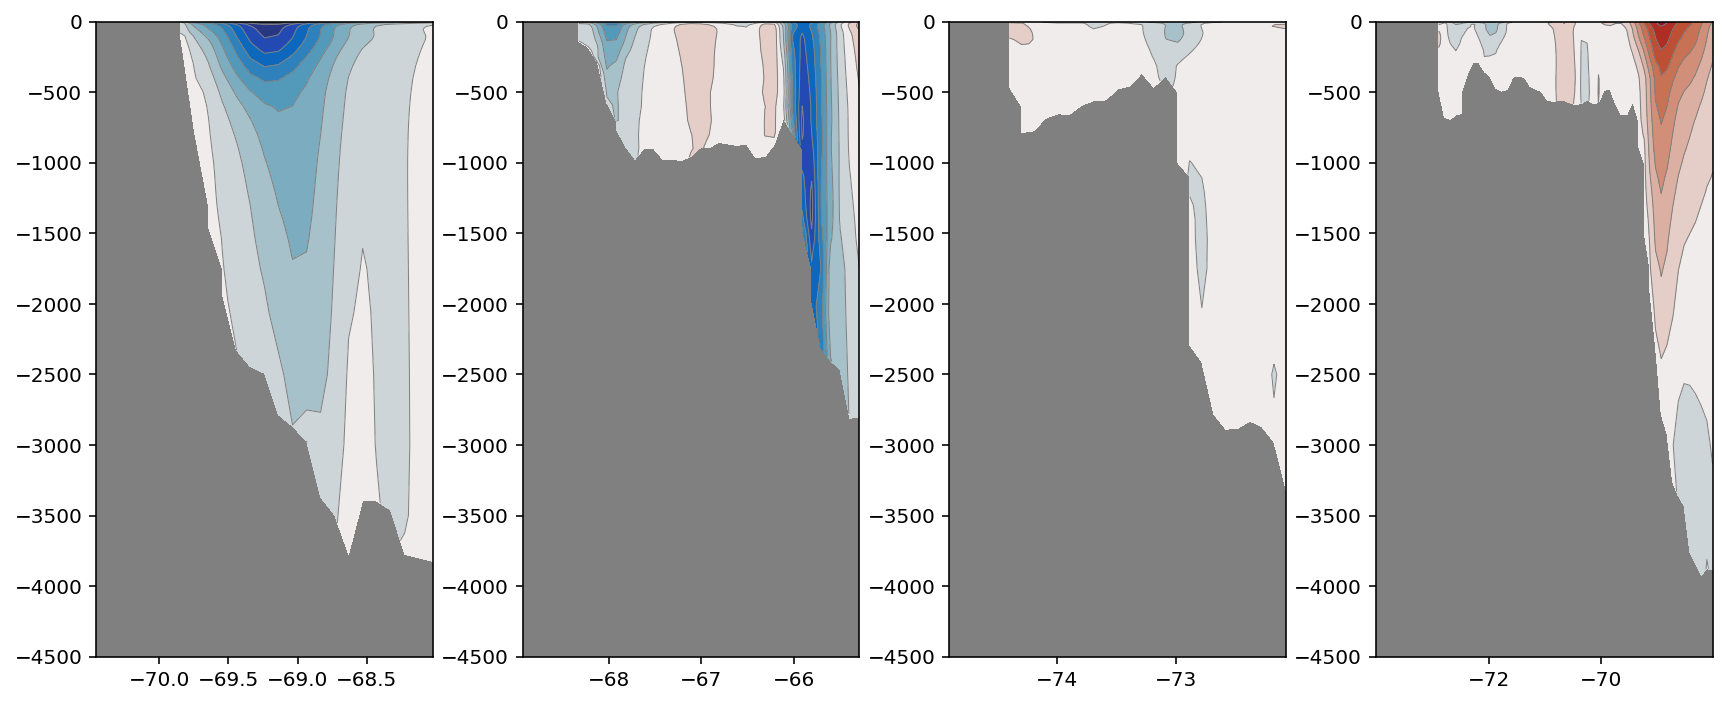

In [29]:
### Velocity at all cross-sections:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(12,5),subplot_kw=dict(facecolor='grey'))
plt.tight_layout()

custom_ylim = (-4500,0)
plt.setp(ax1, ylim=custom_ylim)
plt.setp(ax2, ylim=custom_ylim)
plt.setp(ax3, ylim=custom_ylim)
plt.setp(ax4, ylim=custom_ylim)

levels_vel = np.linspace(-0.16,0.16,20)

ax1.contourf(lat_20e_b,-zl_20e,asc_region_piControl_20e,cmap=cmocean.cm.balance,vmin=-0.16,vmax=0.16,levels=levels_vel,extend='both')
ax1.contour(lat_20e_b,-zl_20e,asc_region_piControl_20e,colors='gray',vmin=-0.16,vmax=0.16,levels=levels_vel,linestyles='-',linewidths=0.5,extend='both')
plt.gca().invert_yaxis()

ax2.contourf(lat_150e_b,-zl_150e,asc_region_piControl_150E,cmap=cmocean.cm.balance,vmin=-0.16,vmax=0.16,levels=levels_vel,extend='both')
ax2.contour(lat_150e_b,-zl_150e,asc_region_piControl_150E,colors='gray',vmin=-0.16,vmax=0.16,levels=levels_vel,linestyles='-',linewidths=0.5)
plt.gca().invert_yaxis()

ax3.contourf(lat_130w_b,-zl_130w,asc_region_piControl_130W,cmap=cmocean.cm.balance,vmin=-0.16,vmax=0.16,levels=levels_vel,extend='both')
ax3.contour(lat_130w_b,-zl_130w,asc_region_piControl_130W,colors='gray',vmin=-0.16,vmax=0.16,levels=levels_vel,linestyles='-',linewidths=0.5)
plt.gca().invert_yaxis()

ax4.contourf(lat_80w_b,-zl_80w,asc_region_piControl_80W,cmap=cmocean.cm.balance,vmin=-0.16,vmax=0.16,levels=levels_vel,extend='both')
ax4.contour(lat_80w_b,-zl_80w,asc_region_piControl_80W,colors='gray',vmin=-0.16,vmax=0.16,levels=levels_vel,linestyles='-',linewidths=0.5)
plt.gca().invert_yaxis()

f.savefig('CM4-piControl_years281-380_truebath.pdf', bbox_inches='tight', dpi=300)